<a href="https://colab.research.google.com/github/jayasuryajsk/quarantine-time-pass/blob/master/brain_tumor_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection

In [12]:
%ls


brain_tumor_dataset/  download.zip  no/  yes/


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
path = Path('/content/data/brain_tumor_dataset/')

In [20]:
path.ls()

[PosixPath('/content/data/brain_tumor_dataset/yes'),
 PosixPath('/content/data/brain_tumor_dataset/no')]

In [0]:
bs = 64 #batch_size

In [0]:
tfms = get_transforms(do_flip=True,max_lighting=0.1,max_rotate=0.1)

In [0]:
data = ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,ds_tfms = tfms,size=224,num_workers=4)

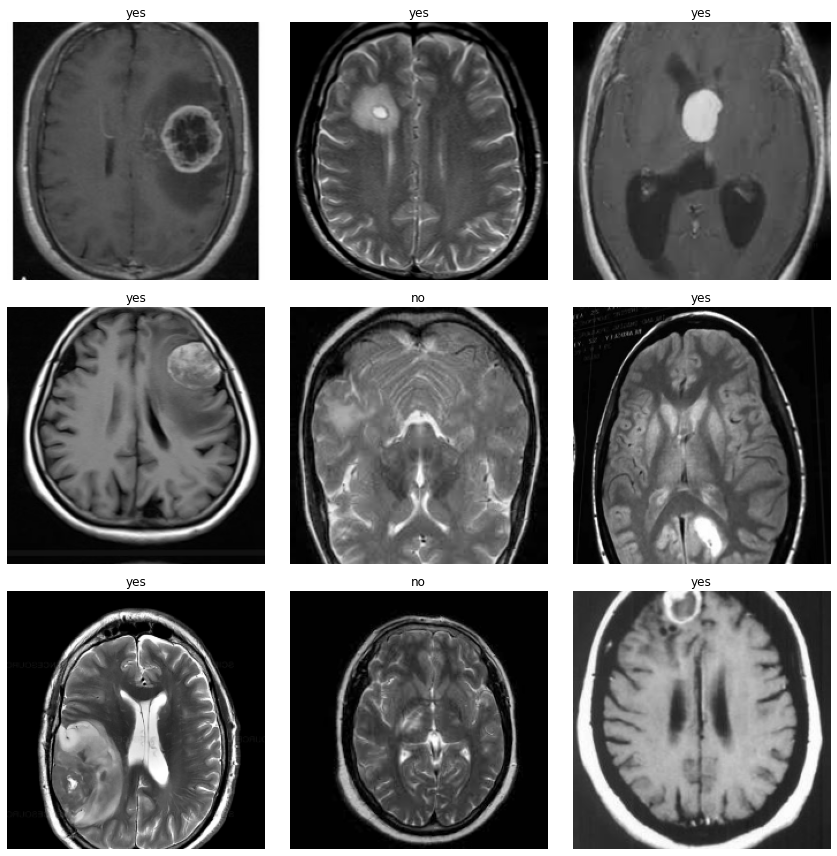

In [41]:
data.show_batch(3)

In [42]:
len(data.classes), len(data.train_ds), len(data.valid_ds)

(2, 203, 50)

In [0]:
fb = FBeta()
fb.average = 'macro'

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=[accuracy,fb])
#learn.model

In [58]:
learn.fit_one_cycle(10,3e-3)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.204617,2.817305,0.340000,0.360169,00:03
1,1.050423,1.350770,0.560000,0.589504,00:03
2,0.902528,0.365295,0.860000,0.866319,00:03
3,0.776682,0.309748,0.920000,0.900729,00:03
4,0.697514,0.455158,0.860000,0.838712,00:03
5,0.597151,0.413441,0.860000,0.827163,00:03
6,0.510477,0.379479,0.880000,0.830557,00:03
7,0.480229,0.378560,0.920000,0.889400,00:03
8,0.422948,0.401527,0.920000,0.889400,00:03
9,0.393715,0.453366,0.860000,0.814338,00:03


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


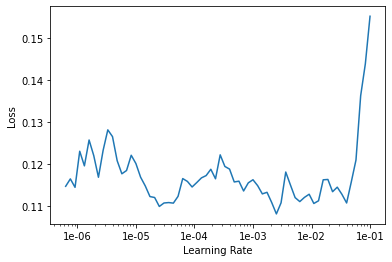

In [59]:
learn.lr_find()
learn.recorder.plot()